In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
dataFolder = "./Data_CNC/"

In [3]:
experiment_result = pd.read_csv(dataFolder + "train.csv")
print(f'train_XX.csv : {experiment_result.shape}')
experiment_result.head(3)

train_XX.csv : (18, 7)


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes


In [4]:
experiment_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [5]:
experiment_result['passed_visual_inspection']

0     yes
1     yes
2     yes
3     NaN
4     NaN
5      no
6     NaN
7      no
8      no
9      no
10    yes
11    yes
12    yes
13    yes
14    yes
15    NaN
16    yes
17    yes
Name: passed_visual_inspection, dtype: object

In [6]:
experiment_result['passed_visual_inspection'] = experiment_result['passed_visual_inspection'].fillna('no')
experiment_result['passed_visual_inspection']

0     yes
1     yes
2     yes
3      no
4      no
5      no
6      no
7      no
8      no
9      no
10    yes
11    yes
12    yes
13    yes
14    yes
15     no
16    yes
17    yes
Name: passed_visual_inspection, dtype: object

In [7]:
experiment_tmp = pd.read_csv(dataFolder + "experiment_01.csv")
print(f'experiment_XX.csv : {experiment_tmp.shape}')
print(experiment_tmp.columns)
experiment_tmp.head(3)

experiment_XX.csv : (1055, 48)
Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep


In [8]:
experiment_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          1055 non-null   float64
 1   X1_ActualVelocity          1055 non-null   float64
 2   X1_ActualAcceleration      1055 non-null   float64
 3   X1_CommandPosition         1055 non-null   float64
 4   X1_CommandVelocity         1055 non-null   float64
 5   X1_CommandAcceleration     1055 non-null   float64
 6   X1_CurrentFeedback         1055 non-null   float64
 7   X1_DCBusVoltage            1055 non-null   float64
 8   X1_OutputCurrent           1055 non-null   float64
 9   X1_OutputVoltage           1055 non-null   float64
 10  X1_OutputPower             1055 non-null   float64
 11  Y1_ActualPosition          1055 non-null   float64
 12  Y1_ActualVelocity          1055 non-null   float64
 13  Y1_ActualAcceleration      1055 non-null   float

In [9]:
filenames = [f'experiment_0{i}.csv' if i < 10 else f'experiment_{i}.csv' for i in range(1,19)]
print(filenames)

['experiment_01.csv', 'experiment_02.csv', 'experiment_03.csv', 'experiment_04.csv', 'experiment_05.csv', 'experiment_06.csv', 'experiment_07.csv', 'experiment_08.csv', 'experiment_09.csv', 'experiment_10.csv', 'experiment_11.csv', 'experiment_12.csv', 'experiment_13.csv', 'experiment_14.csv', 'experiment_15.csv', 'experiment_16.csv', 'experiment_17.csv', 'experiment_18.csv']


In [10]:
frames = []
for (idx, filename) in zip(range(1,19), filenames):
    #load files
    frame = pd.read_csv(dataFolder + filename)

    #load each experiment result row
    filt = experiment_result['No'] == idx
    exp_result_row = experiment_result[filt]
    frame['exp_num'] = idx

    #add experiment settings to features
    frame['material'] = exp_result_row.iloc[0]['material']
    frame['feedrate'] = exp_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = exp_result_row.iloc[0]['clamp_pressure']
    
    #add experiment result to features
    frame['tool_condition'] = exp_result_row.iloc[0]['tool_condition']
    frame['machining_finalized'] = exp_result_row.iloc[0]['machining_finalized']
    frame['passed_visual_inspection'] = exp_result_row.iloc[0]['passed_visual_inspection']

    frames.append(frame)

df = pd.concat(frames, ignore_index = True)
display(df.head(3))
print(df.shape)

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_num,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes


(25286, 55)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

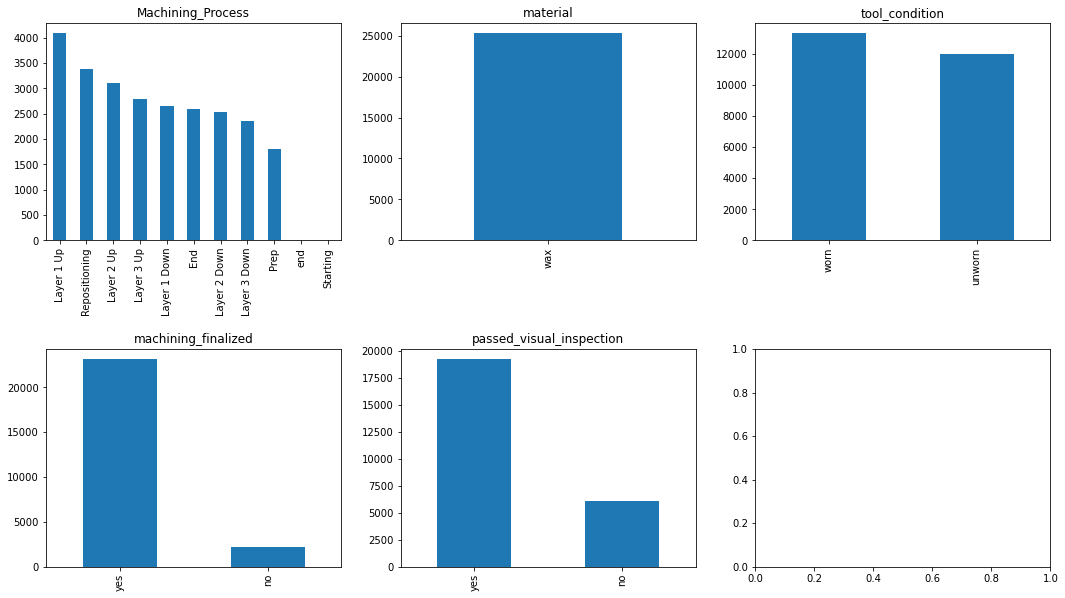

In [12]:
fig, ax = plt.subplots(2,3, figsize=(18,10),gridspec_kw={'hspace': 0.5, 'wspace': 0.2})
df['Machining_Process'].value_counts().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Machining_Process')
df['material'].value_counts().plot.bar(ax=ax[0][1])
ax[0][1].set_title('material')
df['tool_condition'].value_counts().plot.bar(ax=ax[0][2])
ax[0][2].set_title('tool_condition')
df['machining_finalized'].value_counts().plot.bar(ax=ax[1][0])
ax[1][0].set_title('machining_finalized')
df['passed_visual_inspection'].value_counts().plot.bar(ax=ax[1][1])
ax[1][1].set_title('passed_visual_inspection')
display()

In [13]:
display(df['Machining_Process'].value_counts())

Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: Machining_Process, dtype: int64

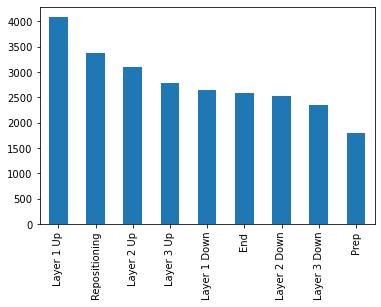

In [14]:
df.replace({'Machining_Process': {'Starting':'Prep','end':'End'}}, inplace=True)
df['Machining_Process'].value_counts().plot.bar()
display()

In [15]:
df = df.drop(columns=['material'])

In [16]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [17]:
leToolCondition = LabelEncoder()

In [18]:
leToolCondition.fit(df['tool_condition'])

LabelEncoder()

In [19]:
leToolCondition.transform(['worn','unworn'])

array([1, 0])

In [20]:
leToolCondition.inverse_transform([0,1])

array(['unworn', 'worn'], dtype=object)

In [21]:
df['tool_condition'] =  leToolCondition.transform(df['tool_condition'])

In [22]:
df['tool_condition']

0        0
1        0
2        0
3        0
4        0
        ..
25281    1
25282    1
25283    1
25284    1
25285    1
Name: tool_condition, Length: 25286, dtype: int32

In [23]:
df = df.drop(columns=['tool_condition', 'machining_finalized', 'passed_visual_inspection'])

In [24]:
leMachiningProcess = LabelEncoder()

In [25]:
df['Machining_Process'] = leMachiningProcess.fit_transform(df['Machining_Process'])

In [26]:
df['Machining_Process'].value_counts()

2    4085
8    3377
4    3104
6    2794
1    2655
0    2593
3    2528
5    2354
7    1796
Name: Machining_Process, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [30]:
cols = df.columns
print(cols)


Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [24]:
dfX = pd.concat([df.iloc[:,0:47], df.iloc[:,50:52]],axis=1)
dfy = df['Machining_Process_LE']

In [25]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [26]:
dfX.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,feedrate,clamp_pressure
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,6,4.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,6,4.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,6,4.0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,6,4.0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,6,4.0


<ipython-input-27-9dfc7ca675a7>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfX.iloc[:,0:20].hist(ax = ax)


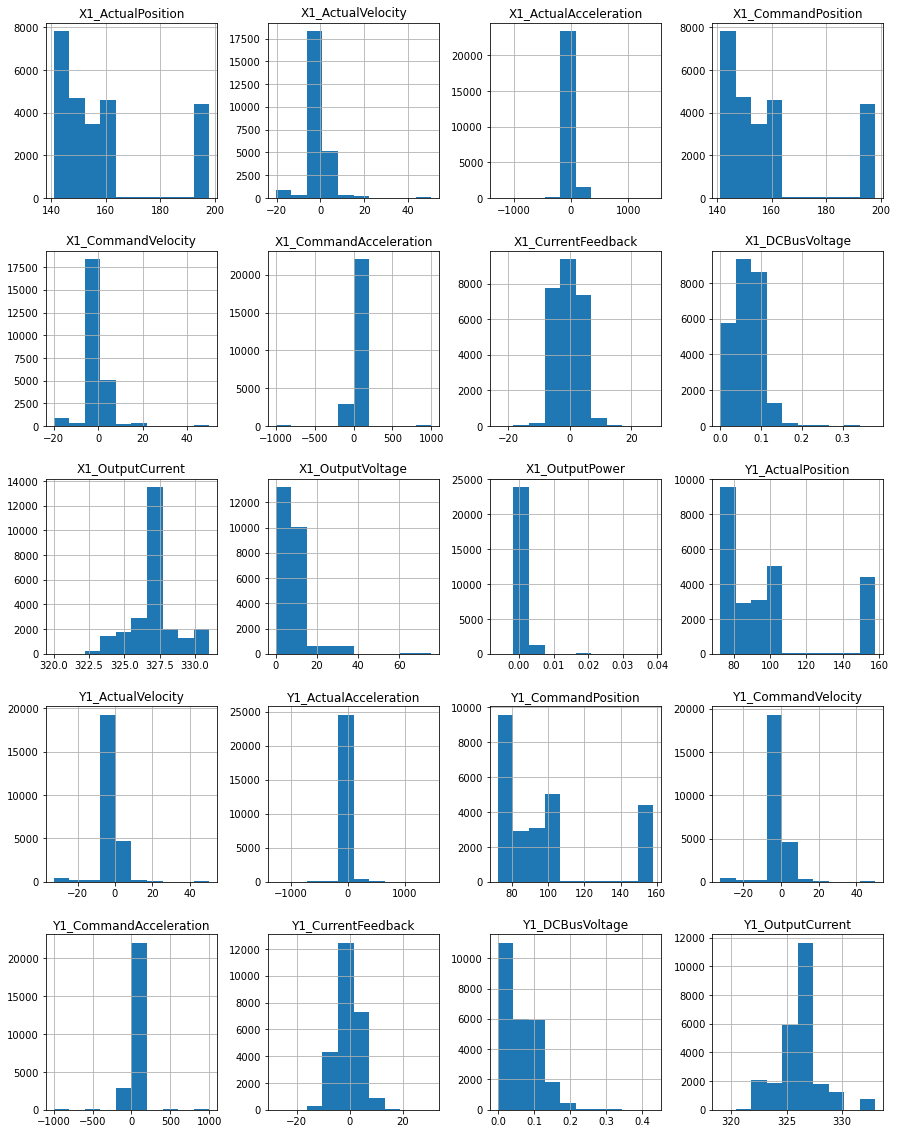

In [27]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dfX.iloc[:,0:20].hist(ax = ax)
display()

In [28]:
X = dfX.values
y = dfy.values

In [39]:
param = "best"
paramSet = {
    "firstTry": {"eta0": 0.01, "n_iter_no_change": 3, "random_state": 5},
    "best": {"eta0": 0.1, "n_iter_no_change": 10, "random_state": 1},
}

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [41]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
ppn = Perceptron(
    eta0=paramSet[param]["eta0"],
    random_state=paramSet[param]["random_state"],
    verbose=0,
    n_iter_no_change=paramSet[param]["n_iter_no_change"],
)

In [43]:
# Training
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, n_iter_no_change=100, random_state=1)

In [44]:
# Prediction
y_pred = ppn.predict(X_test_std)

In [45]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [46]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [47]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 6485
Accuracy score: 0.1451357764302663


In [48]:
y_test.shape

(7586,)